In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

It creates a directory named .kaggle, and the second command copies the file kaggle.json to that directory. Typically, kaggle.json contains the API credentials required to access the Kaggle API and download datasets or participate in Kaggle competitions.

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers  import Dense, Conv2D, MaxPooling2D,  Flatten, BatchNormalization,  Dropout



Generators:   type of data source used for training deep learning models on large datasets that cannot fit entirely into memory. Generators provide a way to generate data on-the-fly, feeding it to the model in batches during the training process. They are commonly used when working with image, text, or sequence data.

In [ ]:
#Generators  for Training Data:
train_ds=keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size =(256,256)
)
valid_ds=keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode ='int',
    batch_size =32,
    image_size =(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


These images are stored as a NumPY array. The problem is that NumPY values are from 0 TO 255, and we need to normalize it from 0 to 1.

In [ ]:
#Normalize
def normal(image,label):
  image =tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(normal)
valid_ds = valid_ds.map(normal)

Normalizing the pixel values to the range of 0.0-1.0 is a common practice in deep learning models as it helps with numerical stability and convergence during training

In [ ]:
#create CNN Model
model =Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding ='valid', activation ='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Conv2D(64, kernel_size =(3,3), padding ='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Conv2D(128, kernel_size =(3,3), padding ='valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),  strides =2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer= 'adam',  loss ='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, epochs =12,  validation_data= valid_ds)

Epoch 1/12
625/625 [==============================] - 78s 120ms/step - loss: 1.3559 - accuracy: 0.5923 - val_loss: 0.7624 - val_accuracy: 0.5416
Epoch 2/12
625/625 [==============================] - 84s 134ms/step - loss: 0.5487 - accuracy: 0.7190 - val_loss: 0.5665 - val_accuracy: 0.7272
Epoch 3/12
625/625 [==============================] - 74s 117ms/step - loss: 0.4713 - accuracy: 0.7756 - val_loss: 1.3978 - val_accuracy: 0.5342
Epoch 4/12
625/625 [==============================] - 70s 111ms/step - loss: 0.4076 - accuracy: 0.8120 - val_loss: 0.4284 - val_accuracy: 0.8096
Epoch 5/12
625/625 [==============================] - 69s 109ms/step - loss: 0.3365 - accuracy: 0.8519 - val_loss: 0.4760 - val_accuracy: 0.7808
Epoch 6/12
625/625 [==============================] - 68s 109ms/step - loss: 0.2650 - accuracy: 0.8861 - val_loss: 0.4941 - val_accuracy: 0.7888
Epoch 7/12
625/625 [==============================] - 65s 103ms/step - loss: 0.1922 - accuracy: 0.9205 - val_loss: 0.4592 - val_ac

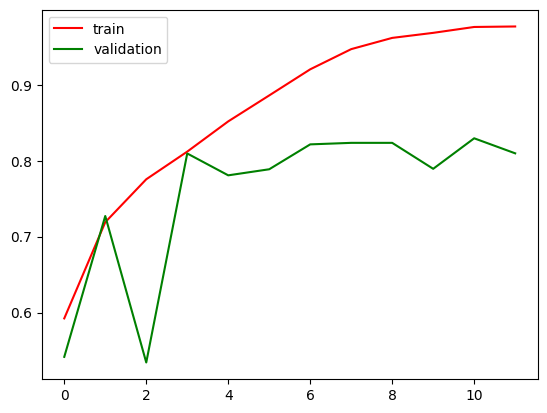

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'green', label ='validation')
plt.legend()
plt.show()

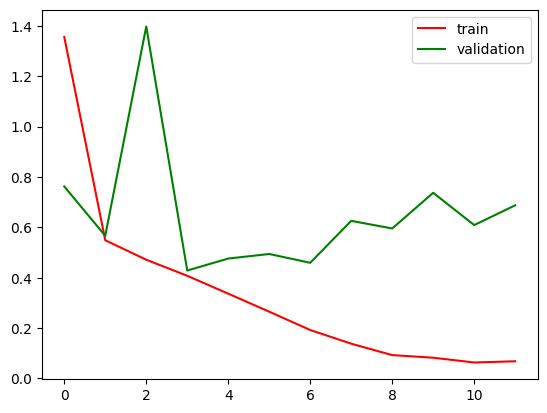

In [ ]:
plt.plot(history.history['loss'],  color='red',  label ='train')
plt.plot(history.history['val_loss'], color ='green', label ='validation')
plt.legend()
plt.show()

Ways to Reduce Overfitting!!!
1. Add more Data
2. Data Augmentation: using existing data,  make more data
3. L1/L2 Regularizer
4. Dropout (use this_
5. Batch Norm (use this_
6. Reduce  Complexity

Result:  Loss by 1/2

In [ ]:
import cv2

In [ ]:
test_img =cv2.imread('/content/Dog.jpg')


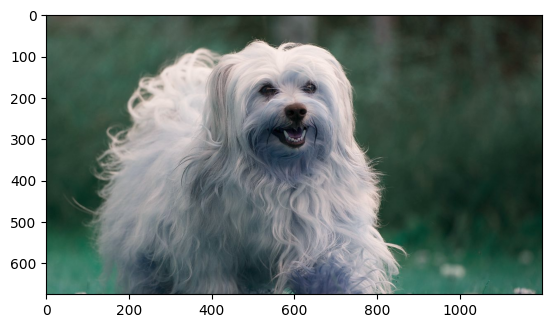

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(675, 1200, 3)

In [ ]:
test_img =cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape(1, 256,256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 283ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img2 =cv2.imread('/content/cat_2.JPG')


(283, 373, 3)

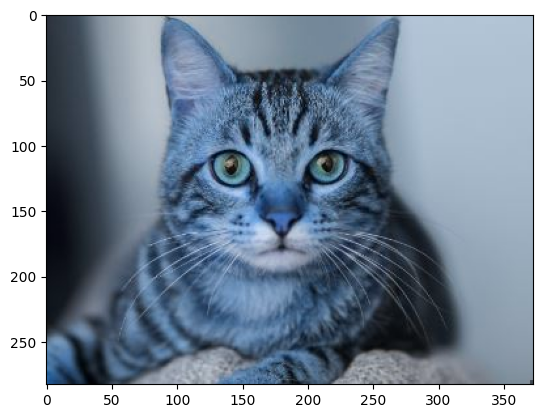

In [ ]:
plt.imshow(test_img2)
test_img2.shape

In [ ]:
test_img2 =cv2.resize(test_img2,(256,256))

In [ ]:
test_input = test_img2.reshape(1, 256,256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)